Loading images
Applying filters
    Gaussian blur
    Sobel edge detect
    Hough line detect
        Found 2321
Plotting
    Original image
    Gaussian blurred image
    Sobel edge detected image
    Hough detected lines
    ........................
Calling show


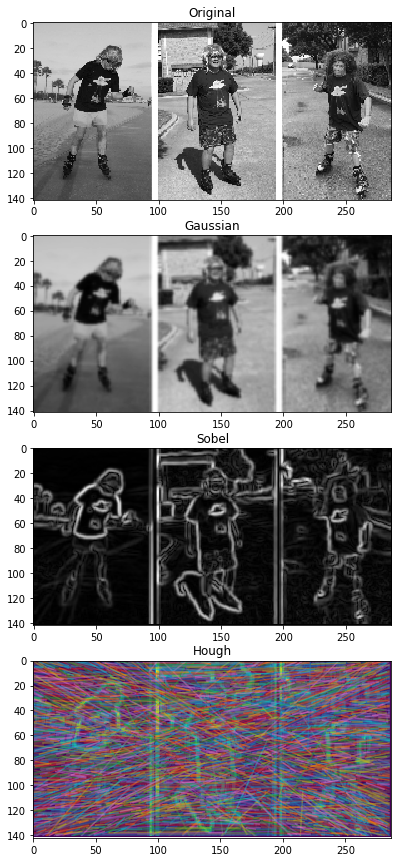

In [34]:
import math
import sys

import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
import matplotlib.cm as plt_cm

from PIL import Image

from skimage.filters import gaussian, sobel
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line, resize

# Load image
print("Loading images")

raw_img = Image.open('./test.jpg').convert('L')
img = np.asarray(raw_img)
resize_fact = 8
img = resize(img, (math.floor(img.shape[0]/resize_fact), math.floor(img.shape[1]/resize_fact)),
             mode='reflect',
             anti_aliasing=False)

# Apply filters
print("Applying filters")

# ... Gaussian Blur
print("    Gaussian blur")

gaussian_img = gaussian(img,
                       sigma=1.0)

# ... Sobel Edge
print("    Sobel edge detect")

sobel_img = sobel(gaussian_img)

# ... Hough Line
print("    Hough line detect")

hough_lines = probabilistic_hough_line(sobel_img,
                                       threshold=10,
                                       line_length=5,
                                       line_gap=3)

print("        Found {}".format(len(hough_lines)))

# Show images
print("Plotting")

fig, axes = plt.subplots(nrows=4,
                         ncols=1,
                         figsize=(15, 15))

# ... Original
print("    Original image")

orig_ax = axes[0]
orig_ax.imshow(img,
               cmap=plt_cm.gray)
orig_ax.set_title('Original')

# ... Gaussian
print("    Gaussian blurred image")

gauss_ax = axes[1]

gauss_ax.imshow(gaussian_img,
                cmap=plt_cm.gray)
gauss_ax.set_title('Gaussian')

# ... Sobel
print("    Sobel edge detected image")

sobel_ax = axes[2]

sobel_ax.imshow(sobel_img,
                cmap=plt_cm.gray)
sobel_ax.set_title('Sobel')

# ... Hough
print("    Hough detected lines")

hough_ax = axes[3]

"""
for _, angle, dist in zip(*hough_line_peaks(hspace, hangles, hdists)):
    y0 = (dist * np.cos(angle)) / np.sin(angle)
    y1 = (dist - img.shape[1] * np.cos(angle)) / np.sin(angle)
    
    hough_ax.plot((0, img.shape[1]),
                  (y0, y1),
                  color='red', 
                  alpha=0.3)
"""
hough_ax.imshow(sobel_img)

sys.stdout.write("    ")

i = 0
for line in hough_lines:
    p0, p1 = line
    hough_ax.plot((p0[0], p1[0]),
                  (p0[1], p1[1]),
                  alpha=0.5)
                   #color='red',
                   #alpha=0.3)
    
    if i % 100 == 0:
        sys.stdout.write(".")
        sys.stdout.flush()
        
    i += 1
print()

hough_ax.set_title('Hough')
hough_ax.set_xlim((0, img.shape[1]))
hough_ax.set_ylim((img.shape[0], 0))

print("Calling show")

plt.show()